Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Ayush Koirala"
ID = "st122802"

---

# Lab 10: Unsupervised Learning with $k$-means and PCA

In this lab, we begin our survey of common unsupervised learning methods such as k-means and PCA.

## Supervised vs. Unsupervised Learning

As we know, in the supervised setting, we are presented with a set of training pairs $(\mathbf{x}^{(i)},y^{(i)}), \mathbf{x}^{(i)} \in {\cal X}, y^{(i)} \in {\cal Y},
i \in 1..m$,
where typically ${\cal X} = \mathbb{R}^n$ and either ${\cal Y} = \mathbb{R}$ (regression) or ${\cal Y} = \{ 1, \ldots, k \}$ (classification). The goal is, given a new
$\mathbf{x} \in {\cal X}$ to come up with the best possible prediction $\hat{y} \in {\cal Y}$ corresponding to $\mathbf{x}$ or a set of predicted probabilities
$p(y=y_i \mid \mathbf{x}), i \in \{1, \ldots, k\}$.

In the *unsupervised setting*, we are presented with a set of training items $\mathbf{x}^{(i)} \in {\cal X}$ without any labels or targets. The goal is generally to
understand, given a new $\mathbf{x} \in {\cal X}$, the relationship of $\mathbf{x}$ with the training examples $\mathbf{x}^{(i)}$.

The phrase *understand the relationship* can mean many different things depending on the problem setting. Among the most common specific goals is *clustering*, in which
we map the training data to $K$ *clusters*, then, given $\mathbf{x}$, find the most similar cluster $c \in \{1,\ldots,K\}$.

## $k$-means Clustering

Clustering is the most common unsupervised learning problem, and $k$-means is the most frequently used clustering algorithm. $k$-means is suitable when 
${\cal X} = \mathbb{R}^n$ and Euclidean distance is a reasonable model of dissimilarity between items in ${\cal X}$.

The algorithm is very simple:
1. Randomly initialize $k$ cluster centroids $\mu_1, \ldots, \mu_k \in \mathbb{R}^n$.
2. Repeat until convergence:
  1. For $i \in 1..m, c^{(i)} \leftarrow \text{argmin}_j \| \mathbf{x}^{(i)} - \mu_j \|^2.$
  2. For $j \in 1..k,$
     $$ \mu_j \leftarrow \frac{\sum_{i=1}^m \delta(c^{(i)} = j)\mathbf{x}^{(i)}}{\sum_{i=1}^m \delta(c^{(i)}=j)}$$

## In-Lab Exercise

Write Python code to generate 100 examples from each of three different well-separated 2D Gaussian distributions. Plot the data, initialize three arbitrary means,
and animate the process of iterative cluster assignment and cluster mean assignment.


<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    there's a naive implementation of the algorithm in this notebook below. You can use it or make your own implementation.
</details>

### Exercise 1.1 (5 points)

Generate 100 examples from each of **three different well-separated 2D Gaussian distributions**.

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    You can use <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html">make_blobs</a> function from sklearn for create dataset. Or you can make them yourself. :)
</details>

In [2]:
X=None
y=None

# YOUR CODE HERE
#raise NotImplementedError()
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples = 300, centers = 3, n_features = 2)

In [3]:
import numpy as np
print('X.shape', X.shape)
print('y.shape', y.shape)
print('X=\n', X[:5])
print('y=\n', y[:5])

print(y.min(), y.max())
print(len(np.unique(y)))

# Test function: Do not remove
assert X.shape == (300, 2), 'Size of X is incorrect'
assert y.shape == (300,) or y.shape == 300 or y.shape == (300,1), 'Size of y is incorrect'
assert len(np.unique(y)) == 3, 'Number groups of samples are incorrect'
for i in np.unique(y):
    assert isinstance(i, np.int64) or isinstance(i, int), 'group type is incorrect'

print("success!")
# End Test function

X.shape (300, 2)
y.shape (300,)
X=
 [[  1.20387331   6.78547056]
 [ -5.13881512 -10.49735595]
 [ -6.97800293  -8.76554689]
 [  9.58012498   1.37042659]
 [  3.37490434   7.01289601]]
y=
 [0 2 2 1 0]
0 2
3
success!


### Exercise 1.2 (5 points)

Plot the data. Separate the data by color.

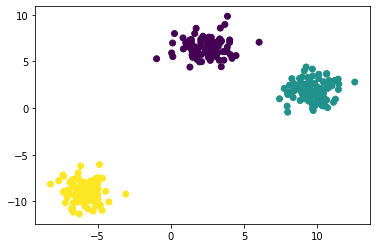

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c=y)

# YOUR CODE HERE
#raise NotImplementedError()

**Expect result**:

![lab10-1.png](attachment:lab10-1.png)

### Exercise 1.3 (20 points)

Initialize three arbitrary means, and animate the process of iterative cluster assignment and cluster mean assignment.

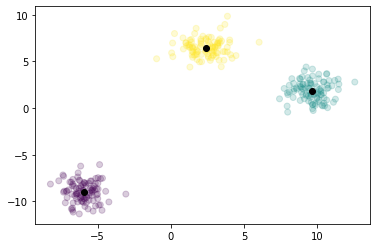

Error 0.0


In [5]:
import numpy as np
from IPython.display import clear_output
import time

# 1. initialize 3 random centers
centers = np.random.uniform(-3,3,size=(3,2))
error = 9999999999.0
count = 1
while True:
    # 2. find the nearest centers for each of the points
    distance = np.empty((X.shape[0],centers.shape[0]))
    for i,x in enumerate(X):
        for j,c in enumerate(centers):
            distance[i,j] = (c-x).T@(c-x)
    nearest = np.argmin(distance,axis=1)

    clear_output(wait=True)
    # 3. plot the graph. Do not forget to use clear_output
    
    plt.scatter(X[:,0],X[:,1],c=nearest,alpha=0.2)
    plt.scatter(centers[:,0],centers[:,1],c='k')
    plt.savefig(str(count) + ".png")
    count+=1
    plt.show()
    
    # 4. find the mean of each centers
    
    mean = centers.copy()
    for i in np.unique(nearest):
        mean[i] = np.mean(X[nearest==i],axis=0)
    
    # 5. calculate sum square error to check error. If the error is less than 1e-6, you can stop the loop.
    
   
    error = np.sum((mean-centers)**2)
    print("Error", np.sum((mean-centers)**2))
    
    if  (np.sum((mean-centers)**2) < 1e-6):
        break
    else: 
         centers = mean
    
    time.sleep(0.3)

# YOUR CODE HERE
#raise NotImplementedError()

In [6]:
print(centers)

# Test function: Do not remove
assert centers.shape == (2, 3) or centers.shape == (3, 2), 'Size of centers is incorrect'

print("success!")
# End Test function

[[-5.94250566 -8.97464533]
 [ 9.6622732   1.87033787]
 [ 2.3936993   6.47877462]]
success!


**Expect result**:

![lab10-2.gif](attachment:lab10-2.gif)

## Example with Kaggle Customer Segmentation Data

This example is based on the [Kaggle Mall Customers Dataset](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python) and [Caner Dabakoglu's](https://www.kaggle.com/cdabakoglu) tutorial on the dataset. The goal is customer segmentation.

The dataset has 5 columns, `CustomerID`, `Gender`, `Age`, `Annual Income`, and `Spending score`.
We will use three of these variables, namely `Age`, `Annual Income`, and `Spending score` for segmenting customers.
(Give some thought to why we don't use `CustomerID` or `Gender`.)

First, let's import some libraries:

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Next we read the data set and print out some information about it.

In [9]:
df = pd.read_csv("Mall_Customers.csv")

print('Dataset information:\n')
df.info()
print('\nDataset head (first five rows):\n')
df.head()

Dataset information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Dataset head (first five rows):



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Let's drop the `CustomerID` column, as it's not useful.

In [10]:
df.drop(["CustomerID"], axis = 1, inplace=True)

Next, let's visualize the marginal distribution over each variable, to get an idea of how cohesive they are. We can see that the variables are not
quite Gaussian and have some skew:

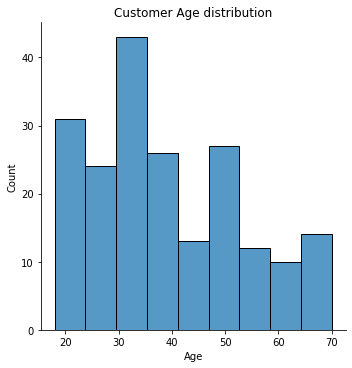

In [11]:
sns.displot(df.Age)
_ = plt.title('Customer Age distribution')

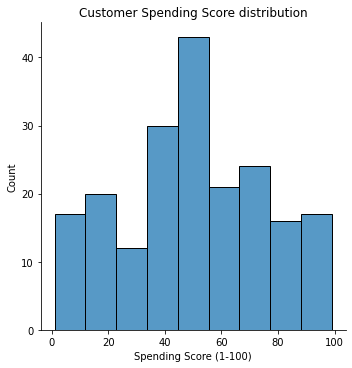

In [12]:
sns.displot(df['Spending Score (1-100)'])
_ = plt.title('Customer Spending Score distribution')

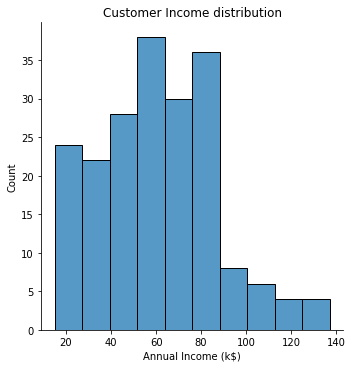

In [13]:
sns.displot(df['Annual Income (k$)'])
_ = plt.title('Customer Income distribution')

Next, let's make a 3D scatter plot of the relevant variables:

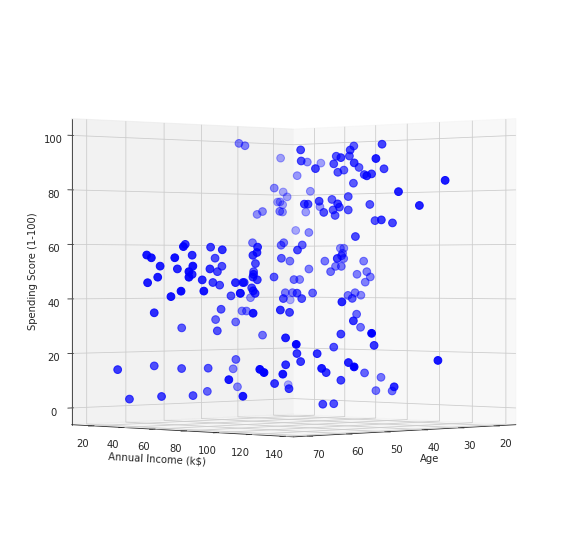

In [14]:
sns.set_style("white")
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age, df["Annual Income (k$)"], df["Spending Score (1-100)"], c='blue', s=60)
ax.view_init(0, 45)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

Next, let's implement $k$-means:

In [15]:
# Initialize a k-means model given a dataset

def init_kmeans(X, k):
    m = X.shape[0]
    n = X.shape[1]
    means = np.zeros((k,n))
    order = np.random.permutation(m)[:k]
    for i in range(k):
        means[i,:] = X[order[i],:]
    return means

# Run one iteration of k-means

def iterate_kmeans(X, means):
    m = X.shape[0]
    n = X.shape[1]
    k = means.shape[0]
    distortion = np.zeros(m)
    c = np.zeros(m)
    for i in range(m):
        min_j = 0
        min_dist = 0
        for j in range(k):
            dist_j = np.linalg.norm(X[i,:] - means[j,:])
            if dist_j < min_dist or j == 0:
                min_dist = dist_j
                min_j = j
        distortion[i] = min_dist
        c[i] = min_j
    for j in range(k):
        means[j,:] = np.zeros((1,n))
        nj = 0
        for i in range(m):
            if c[i] == j:
                nj = nj + 1
                means[j,:] = means[j,:] + X[i,:]
        if nj > 0:
            means[j,:] = means[j,:] / nj
    return means, c, np.sum(distortion)

Let's build models with $k \in 1..20$, plot the distortion for each $k$, and try to choose a good value for $k$ using the so-called "elbow method."

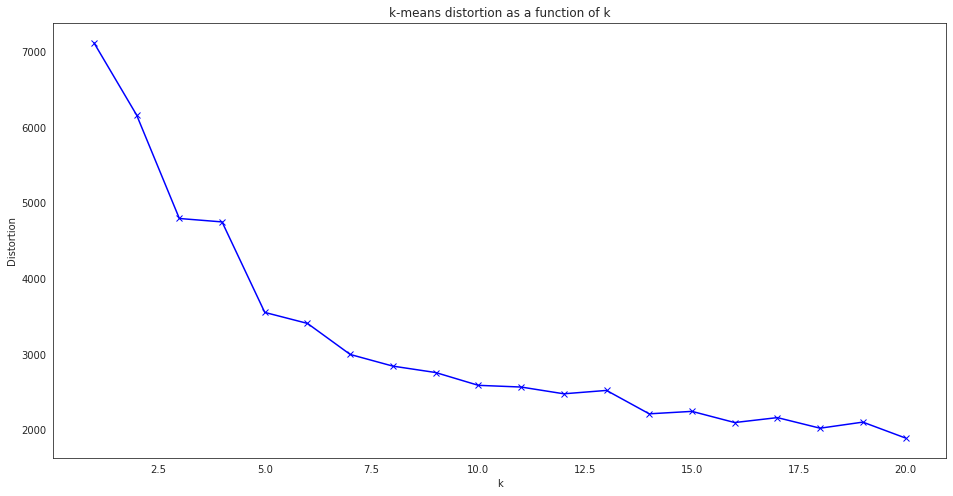

In [16]:
# Convert dataframe to matrix

X = np.array(df.iloc[:,1:])

# Intialize hyperparameters

max_k = 20
epsilon = 0.001

# For each value of k, do one run and record the resulting cost (Euclidean distortion)

distortions = np.zeros(max_k)
for k in range(1, max_k + 1):
    means = init_kmeans(X, k)
    prev_distortion = 0
    while True:
        means, c, distortion = iterate_kmeans(X, means)
        if prev_distortion > 0 and prev_distortion - distortion < epsilon:
            break
        prev_distortion = distortion
    distortions[k-1] = distortion

# Plot distortion as function of k

plt.figure(figsize=(16,8))
plt.plot(range(1,max_k+1), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('k-means distortion as a function of k')
plt.show()

Read about the so-called "elbow method" in [Wikipedia](https://en.wikipedia.org/wiki/Elbow_method_(clustering)). Note what it says,
that "In practice there may not be a sharp elbow, and as a heuristic method, such an 'elbow' cannot always be unambiguously identified." 

Do you see a unique elbow in the distortion plot above?

Note that the results are somewhat noisy, being dependent on initial conditions.

Here's a visualization of the results for three clusters:

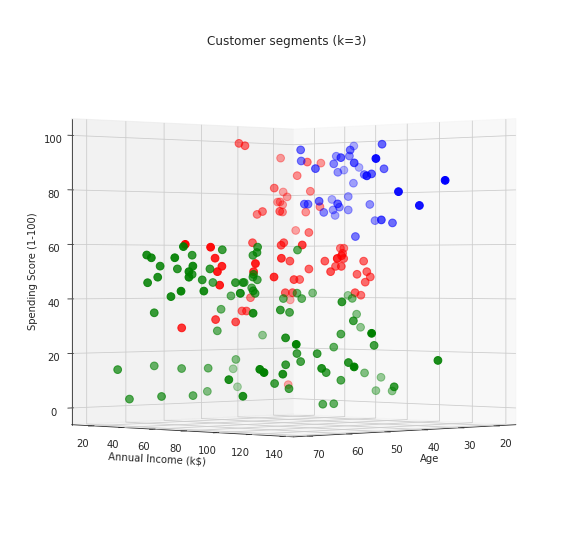

In [17]:
# Re-run k-means with k=3

k = 3
means = init_kmeans(X, k)
prev_distortion = 0
while True:
    means, c, distortion = iterate_kmeans(X, means)
    if prev_distortion > 0 and prev_distortion - distortion < epsilon:
        break
    prev_distortion = distortion
    
# Set labels in dataset to cluster IDs according to k-means model.

df["label"] = c

# Plot the data

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)

# For 5 clusters, you can uncomment the following two lines.

#ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
#ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)

ax.view_init(0, 45)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.title('Customer segments (k=3)')
plt.show()

## In-Lab Exercise 2

1. Consider the three cluster centers above. Look at the three means closely and come up with English descriptions of each cluster from a business point of view. Label the clusters in the visualization accordingly.
2. Note that the distortion plot is quite noisy due to random initial conditions. Modify the optimization to perfrom, for each $k$, several different runs, and take the minimum distortion over those runs. Re-plot the distortion plot and see if an "elbow" is more prominent.


### Exercise 2.1 (10 points)

Consider the three cluster centers above. Look at the three means closely and come up with English descriptions of each cluster from a business point of view. Label the clusters in the visualization accordingly.

In [18]:
# YOUR CODE HERE
#raise NotImplementedError()
# YOUR CODE HERE
print('Gender distribution in lable 0 is \n ', (df['Gender'].loc[df['label'] == 0].value_counts()))
print('Gender distribution in lable 1 is \n ',(df['Gender'].loc[df['label'] == 1].value_counts()))
print('Gender distribution in lable 2 is \n ',(df['Gender'].loc[df['label'] == 2].value_counts()))
print('*' * 10)
print('Average age in label 0 is ', df['Age'].loc[df['label'] == 0].mean())
print('Average age in label 1 is ', df['Age'].loc[df['label'] == 1].mean())
print('Average age in label 2 is ', df['Age'].loc[df['label'] == 2].mean())

Gender distribution in lable 0 is 
  Female    21
Male      18
Name: Gender, dtype: int64
Gender distribution in lable 1 is 
  Female    41
Male      26
Name: Gender, dtype: int64
Gender distribution in lable 2 is 
  Female    50
Male      44
Name: Gender, dtype: int64
**********
Average age in label 0 is  32.69230769230769
Average age in label 1 is  29.44776119402985
Average age in label 2 is  48.1063829787234


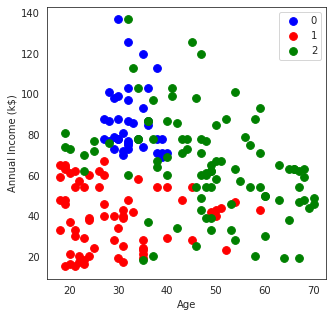

In [19]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0],  c='blue', s=60 , label = '0')
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1],  c='red', s=60, label = '1')
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2],  c='green', s=60, label = '2')
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.legend()
plt.show()

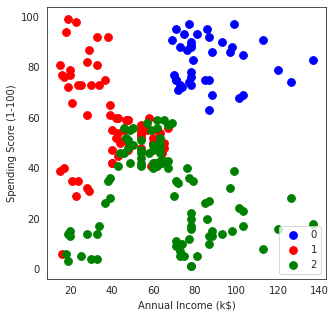

In [20]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.scatter(df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0],  c='blue', s=60 , label = '0')
ax.scatter(df["Annual Income (k$)"][df.label == 1],df["Spending Score (1-100)"][df.label == 1],  c='red', s=60, label = '1')
ax.scatter(df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2],  c='green', s=60, label = '2')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

The clusters have been separated mainly with Annual Income Rates. The Highest earners in the 2nd cluster and lowest earners in the 1st cluster.

The Gender seems to be roughly evenly distributed between the clusters.

Cluster 0 has Low to middle annual income earners but medium to high spending scores. The average age is 47. So these are middle aged people. with low income and average spending habits.

Cluster 1 has low Annual Income and Very High Spending scores with mostly younger people. Average age is 28. These seemed to be youngsters like to spend a lot.

Cluster 2 has high Annual Income and low to high spending scores. The average age is 40. So these are also middle aged people who earn a lot but dont like to spend too much. They like to save money it seems.

### Exercise 2.2 (20 points)

Note that the distortion plot is quite noisy due to random initial conditions. Modify the optimization to perfrom, for each $k$, several different runs, and take the minimum distortion over those runs. Re-plot the distortion plot and see if an "elbow" is more prominent.

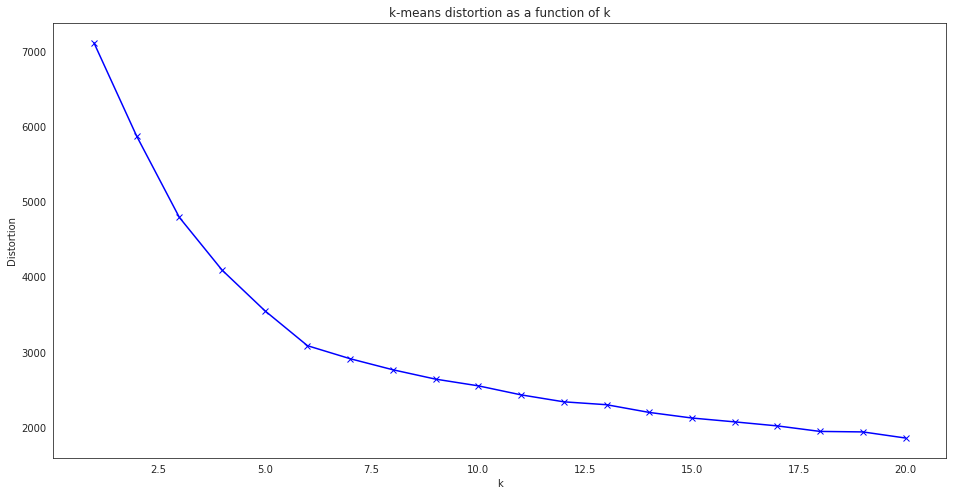

In [21]:
# YOUR CODE HERE
#raise NotImplementedError()
# YOUR CODE HERE
no_of_init = 10 #try 10 different initialisations

# Convert dataframe to matrix

X = np.array(df.iloc[:,1:])

# Intialize hyperparameters

max_k = 20
epsilon = 0.001

# For each value of k, do one run and record the resulting cost (Euclidean distortion)
distortions = np.zeros(max_k)
for k in range(1, max_k + 1):
    min_distortion = np.inf
    for _ in range(no_of_init):
        means = init_kmeans(X, k)
        new_distortion = 0
        while True:
            means, c, distortion = iterate_kmeans(X, means)
            if new_distortion > 0 and new_distortion - distortion < epsilon:
                break
            new_distortion = distortion
        if distortion < min_distortion:
            min_distortion = distortion
            min_c = c
            min_means = means
    distortions[k-1] = min_distortion

# Plot distortion as function of k

plt.figure(figsize=(16,8))
plt.plot(range(1,max_k+1), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('k-means distortion as a function of k')
plt.show()

## K-Means in PyTorch

Now, to get more experience with PyTorch, let's do the same thing with the library. First, some imports. You may need to install some packages for this to work:

    pip install kmeans-pytorch
    pip install tqdm
    
First, import the libraries:

In [23]:
!pip install kmeans-pytorch
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import torch
from kmeans_pytorch import kmeans

In [25]:
x =  torch.from_numpy(X)
device = 'cuda:0'
device = 'cpu'
c, means = kmeans(X=x, num_clusters=3, distance='euclidean', device=torch.device(device))
df["label"] = c

running k-means on cpu..


[running kmeans]: 15it [00:00, 80.53it/s, center_shift=0.000000, iteration=15, tol=0.000100]


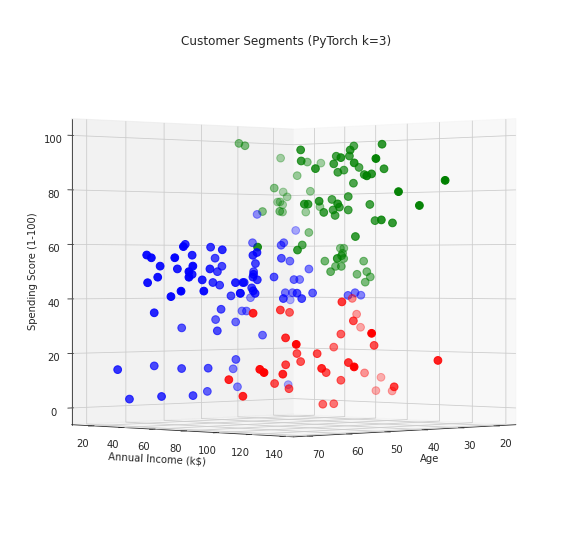

In [26]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
#ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
#ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(0, 45)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.title('Customer Segments (PyTorch k=3)')
plt.show()

## Take-Home Exercise

Find an interesting dataset for unsupervised learning, prepare the data, and run $k$-means on it.

In a brief report, describe your in-lab and take home experiments and their results.

In [29]:
df_cc = pd.read_csv("CC GENERAL.csv")

In [30]:
df_cc[:5]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [31]:
#we wil only use 4 columns for simplicity and take only 1000 samples
df_cc = df_cc[['BALANCE','PURCHASES','PAYMENTS','CASH_ADVANCE']]

In [32]:
df_cc.isna().sum()

BALANCE         0
PURCHASES       0
PAYMENTS        0
CASH_ADVANCE    0
dtype: int64

In [33]:
df.dropna(inplace=True)

In [34]:
df_cc.describe()

,BALANCE,PURCHASES,PAYMENTS,CASH_ADVANCE
count,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,1003.204834,1733.143852,978.871112
std,2081.531879,2136.634782,2895.063757,2097.163877
min,0.000000,0.000000,0.000000,0.000000
25%,128.281915,39.635000,383.276166,0.000000
50%,873.385231,361.280000,856.901546,0.000000
75%,2054.140036,1110.130000,1901.134317,1113.821139
max,19043.138560,49039.570000,50721.483360,47137.211760


In [35]:
df_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BALANCE       8950 non-null   float64
 1   PURCHASES     8950 non-null   float64
 2   PAYMENTS      8950 non-null   float64
 3   CASH_ADVANCE  8950 non-null   float64
dtypes: float64(4)
memory usage: 279.8 KB


In [36]:
Q1 = df_cc.quantile(0.25)
Q3 = df_cc.quantile(0.75)

#we only take data within the Quartiles
df_cc = df_cc[~((df_cc < (Q1)) |(df_cc > (Q3))).any(axis=1)]

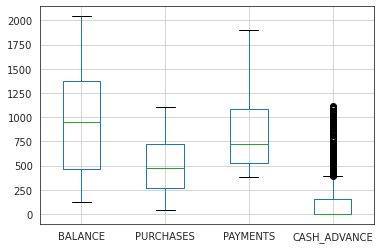

In [37]:
df_cc.boxplot()

In [38]:
X = np.array(df_cc)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
 4   label                   200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


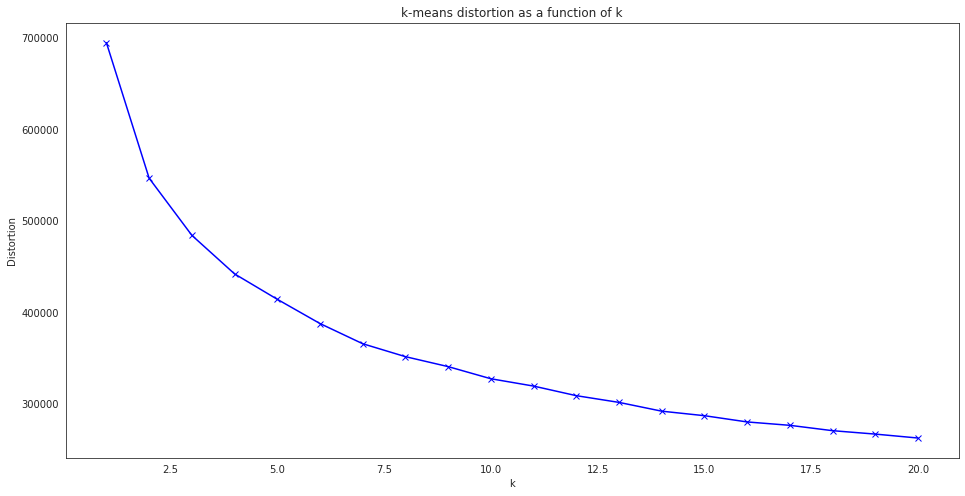

In [40]:
# YOUR CODE HERE
no_of_init = 5 #try 5 different initialisations

# Convert dataframe to matrix

# Intialize hyperparameters

max_k = 20
epsilon = 0.001

# For each value of k, do one run and record the resulting cost (Euclidean distortion)
distortions = np.zeros(max_k)
for k in range(1, max_k + 1):
    min_distortion = np.inf
    for _ in range(no_of_init):
        means = init_kmeans(X, k)
        new_distortion = 0
        while True:
            means, c, distortion = iterate_kmeans(X, means)
            if new_distortion > 0 and new_distortion - distortion < epsilon:
                break
            new_distortion = distortion
        if distortion < min_distortion:
            min_distortion = distortion
            min_c = c
            min_means = means
    distortions[k-1] = min_distortion

# Plot distortion as function of k

plt.figure(figsize=(16,8))
plt.plot(range(1,max_k+1), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('k-means distortion as a function of k')
plt.show()


In [41]:
#There Seems to be a good elbow at around 4 cluster so lets try that.
x = torch.from_numpy(X)
device = 'cuda:0'
device = 'cpu'
c, means = kmeans(X=x, num_clusters=4, distance='euclidean', device=torch.device(device))
df_cc["label"] = c

running k-means on cpu..


[running kmeans]: 11it [00:00, 369.36it/s, center_shift=0.000000, iteration=11, tol=0.000100]


In [42]:
df_cc[:5]

,BALANCE,PURCHASES,PAYMENTS,CASH_ADVANCE,label
7,1823.652743,436.20,679.065082,0.000000,3
8,1014.926473,861.49,688.278568,0.000000,2
10,1293.124939,920.12,1083.301007,0.000000,3
18,1989.072228,504.35,1720.837373,0.000000,3
26,1615.967240,102.00,890.178845,244.840485,3


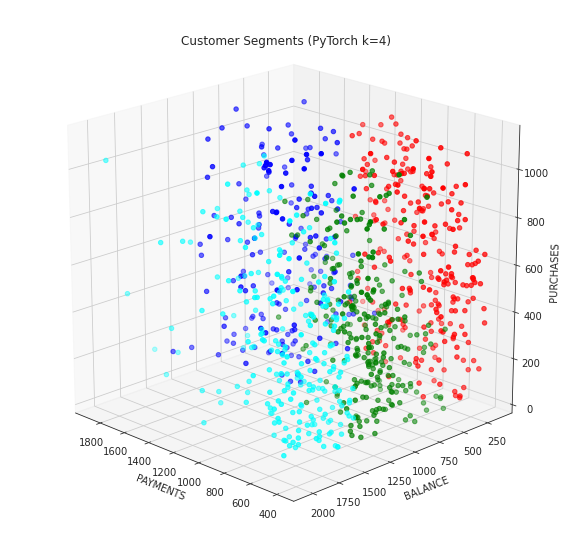

In [43]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_cc.PAYMENTS[df_cc.label == 0], df_cc["BALANCE"][df_cc.label == 0], df_cc["PURCHASES"][df_cc.label == 0], c='blue' )
ax.scatter(df_cc.PAYMENTS[df_cc.label == 1], df_cc["BALANCE"][df_cc.label == 1], df_cc["PURCHASES"][df_cc.label == 1], c='red' )
ax.scatter(df_cc.PAYMENTS[df_cc.label == 2], df_cc["BALANCE"][df_cc.label == 2], df_cc["PURCHASES"][df_cc.label == 2], c='green' )
ax.scatter(df_cc.PAYMENTS[df_cc.label == 3], df_cc["BALANCE"][df_cc.label == 3], df_cc["PURCHASES"][df_cc.label == 3], c='cyan')
ax.view_init(20, 135)
plt.xlabel("PAYMENTS")
plt.ylabel("BALANCE")
ax.set_zlabel('PURCHASES')
plt.title('Customer Segments (PyTorch k=4)')
plt.show()

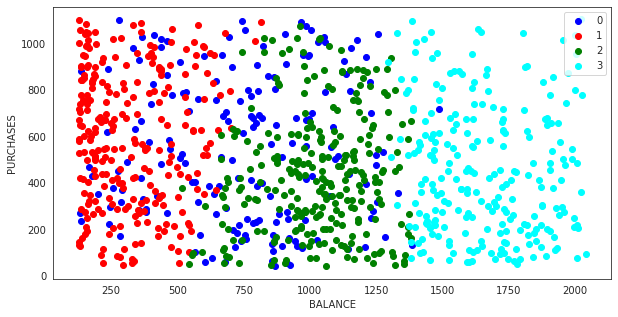

In [44]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(df_cc["BALANCE"][df_cc.label == 0], df_cc["PURCHASES"][df_cc.label == 0], c='blue',label = 0 )
ax.scatter(df_cc["BALANCE"][df_cc.label == 1], df_cc["PURCHASES"][df_cc.label == 1], c='red',label = 1)
ax.scatter(df_cc["BALANCE"][df_cc.label == 2], df_cc["PURCHASES"][df_cc.label == 2], c='green',label = 2 )
ax.scatter(df_cc["BALANCE"][df_cc.label == 3], df_cc["PURCHASES"][df_cc.label == 3], c='cyan',label = 3 )
plt.xlabel("BALANCE")
plt.ylabel("PURCHASES")
plt.legend()
plt.show()

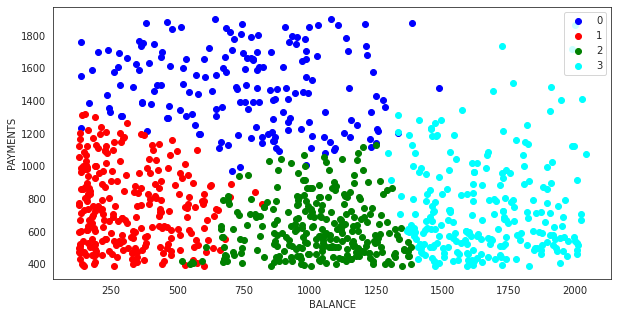

In [45]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.scatter(df_cc["BALANCE"][df_cc.label == 0], df_cc["PAYMENTS"][df_cc.label == 0], c='blue', label = 0 )
ax.scatter(df_cc["BALANCE"][df_cc.label == 1], df_cc["PAYMENTS"][df_cc.label == 1], c='red',label = 1 )
ax.scatter(df_cc["BALANCE"][df_cc.label == 2], df_cc["PAYMENTS"][df_cc.label == 2], c='green',label = 2 )
ax.scatter(df_cc["BALANCE"][df_cc.label == 3], df_cc["PAYMENTS"][df_cc.label == 3], c='cyan',label = 3 )
plt.xlabel("BALANCE")
plt.ylabel("PAYMENTS")
plt.legend()
plt.show()

We can see from the aobve plots that the 4 clusters are most distinct with the balance and paymentsPurchase seem to be evenly distributed across the all the clusters. Ignoring the people with 0 Cash_Advance we can see that is also evenly distributed among the 4 clusters. The major separators are the Balance and Payments.

Cluster 0 includes people with low to average balance and with high payments, Cluster 1 includes people iwht medium balance and low payments,CLuster 2 includes people with low payments and low balance,cluster 3 includes people with high balances and low payments.

## Principle Component Analysis (PCA)

PCA or Principal Component Analysis is a data transformation tecnique for decreasing dimensions or features. This technique is useful for decreasing the complexity of a data set and for visualization.

In visualization, you want to see your data as lines, points, and a point cloud. It is easy to see if it is three dimensions or less. What about four dimesions? Oh no, we cannot show it clearly, so further
decreasing dimensionality might help.

In machine learning, having many features as possible might be useful for accurate modeling accurately. However, it is not every case that too much information could help such as unrelated features, features that are dependent 
on each other, or simply too many features (the curse of dimensionality).

## What happens after PCA?

Main concept of PCA is to find a new axis which can project a lot of data features as much as possible. The new axis is come from those features, so the new data still keep variance of data same as before decreasing dimensions.

![pca](PCA1.png)

Assume you have $n$ set of data with $d$ features which tell you from the smallest thing (such as atom). After using PCA, you will get the $n$ set of data with $k$ features which tell you in group of things.

![pca](PCA2.png)


### Mathematics of PCA

Assume $w$ is a unit vector along the axis
along which the data vary as much as possible, and mean vector $\mu=\frac{1}{m}\sum_{i=1}^mx^{(i)}$.

\begin{equation}
w_1 = \text{argmax}_w \frac{1}{m} \sum_{i=1}^m (w^T(x^{(i)}-\mu))^2 \\
= \text{argmax}_w \frac{1}{m} \sum_{i=1}^m (w^T(x^{(i)}-\mu)(x^{(i)}-\mu)^Tw) \\
= \text{argmax}_w w^T \color{red}{S}w
\end{equation}

In this case $S$ is the **covariance matrix** of the dataset $\mathtt{X}$.

### Step By Step Computation in PCA

The below steps need to be followed to perform dimensionality reduction using PCA:

1. Standardization of the data
2. Computing the covariance matrix
3. Calculating the eigenvectors and eigenvalues
4. Computing the principal components
5. Reducing the dimensions of the data set

#### Let's start

In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA
import seaborn

Load movie names and movie ratings

In [47]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
ratings.drop(['timestamp'], axis=1, inplace=True)

In [48]:
n_ratings = len(ratings)
n_movies = ratings['movieId'].nunique()
n_users = ratings['userId'].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per movie: {round(n_ratings/n_movies, 2)}")

Number of ratings: 100836
Number of unique movieId's: 9724
Number of unique users: 610
Average number of ratings per user: 165.3
Average number of ratings per movie: 10.37


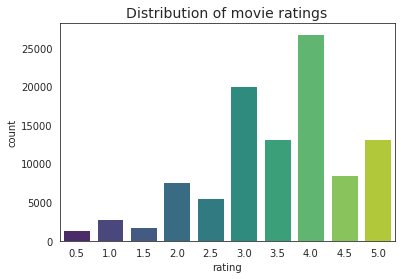

In [49]:
seaborn.countplot(x="rating", data=ratings, palette="viridis")
plt.title("Distribution of movie ratings", fontsize=14)
plt.show()

**Formatting the data**

In [50]:
def replace_name(x):
    return movies[movies['movieId']==x].title.values[0]

ratings.movieId = ratings.movieId.map(replace_name)
M = ratings.pivot_table(index=['userId'], columns=['movieId'], values='rating')
m = M.shape
df1 = M.replace(np.nan, 0, regex=True)

### 1) Standardization of the data

Standardization is the way to scale data into same scale. Because some information such as housing price (10,000-100,000 us) and area size (100-1000$m^2$) are not the same scale. It makes impact in one data, but another has lower impact.

Standardization can be calculated in many way. One of the equation is:

\begin{equation}
Z = \frac{x - \mu}{\sigma}
\end{equation}

In [51]:
X_std = StandardScaler().fit_transform(df1)

### 2) Compute the covariance matrix

Covariance matrix is a $p\times p$ matrix where $p$ represents the dimension of the dataset. Each entry in the matrix represents the covariance of the corresponding variables.

For 2-dimensional dataset with variable $a$ and $b$, the covariance matrix is $2\times 2$ matrix as:

\begin{equation}
S=\begin{bmatrix}
cov(a,a) & cov(a,b) \\ 
cov(b,a) & cov(b,b)
\end{bmatrix} = (x_t-\mu)(x_t-\mu)^T
\end{equation}

We can say that $cov(a,b)=cov(b,a)$.

In [52]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix n%s' %cov_mat)

Covariance matrix n[[ 1.00164204 -0.00164473 -0.00232791 ...  0.32582147 -0.00819887
  -0.00164473]
 [-0.00164473  1.00164204  0.70768614 ... -0.00360024 -0.00819887
  -0.00164473]
 [-0.00232791  0.70768614  1.00164204 ... -0.00509569 -0.01160448
  -0.00232791]
 ...
 [ 0.32582147 -0.00360024 -0.00509569 ...  1.00164204 -0.01794692
  -0.00360024]
 [-0.00819887 -0.00819887 -0.01160448 ... -0.01794692  1.00164204
  -0.00819887]
 [-0.00164473 -0.00164473 -0.00232791 ... -0.00360024 -0.00819887
   1.00164204]]


### 3) Calculating the Eigenvectors and Eigenvalues

Eigenvectors and eigenvalues are the mathematical constructs that must be computed from the covariance matrix in order to determine the principal components of the data set.

**What are Principal Components?**

Principal components are the new set of variables that are obtained from the initial set of variables. The principal components are computed in such a manner that newly obtained variables are highly significant and independent of each other. The principal components compress and possess most of the useful information that was scattered among the initial variables.

*If dataset of 5 dimensions, then 5 principal components are computed, such that, the first principal component stores the maximum possible information and the second one stores the remaining maximum info and so on, you get the idea.*

**Eigenvectors fall into this process**

Consider a 2-Dimensional data set, for which 2 eigenvectors (and their respective eigenvalues) are computed. The idea behind eigenvectors is to use the Covariance matrix to understand where in the data there is the most amount of variance. Since more variance in the data denotes more information about the data, eigenvectors are used to identify and compute Principal Components


Eigenvalues, on the other hand, simply denote the scalars of the respective eigenvectors. Therefore, eigenvectors and eigenvalues will compute the Principal Components of the data set.

In [53]:
#Calculating eigenvectors and eigenvalues on covariance matrix
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors n%s' %eig_vecs)
print('nEigenvalues n%s' %eig_vals)

Eigenvectors n[[-6.17879786e-03+0.j  7.13214703e-03+0.j  3.60191232e-03+0.j ...
  -2.84041919e-28+0.j  1.84417065e-24+0.j -5.67551521e-34+0.j]
 [-1.37389338e-04+0.j -6.19748724e-05+0.j -2.68242736e-06+0.j ...
   1.39303029e-19+0.j -9.76847373e-20+0.j -1.22386187e-19+0.j]
 [ 3.98116838e-05+0.j -1.70073920e-04+0.j -3.54723573e-05+0.j ...
  -2.36279315e-20+0.j  4.72967682e-19+0.j  2.75844938e-19+0.j]
 ...
 [-5.71402600e-03+0.j  4.61929109e-03+0.j  3.30601109e-03+0.j ...
  -1.80592935e-19+0.j  8.68279668e-22+0.j  9.88984815e-20+0.j]
 [-1.45210348e-02+0.j -3.31390410e-04+0.j  3.25182697e-03+0.j ...
   2.06505015e-20+0.j -7.23951080e-20+0.j  4.46656546e-20+0.j]
 [-3.15495954e-05+0.j -1.35658850e-04+0.j -4.29513318e-05+0.j ...
  -4.05855125e-20+0.j -1.42112853e-19+0.j -5.88853670e-20+0.j]]
nEigenvalues n[ 6.94634737e+02+0.j  4.87220689e+02+0.j  4.38988949e+02+0.j ...
 -2.78391648e-73+0.j  9.92817735e-70+0.j  1.91884682e-79+0.j]


**Compute the feature vector**

Rearrange the eigenvalues in descending order. This represents the significance of the principal components in descending order:

In [54]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Streaming output truncated to the last 5000 lines.
1.012471501297052e-14
8.23702403411451e-15
8.23702403411451e-15
8.388758850488824e-15
8.388758850488824e-15
9.496596798246191e-15
9.496596798246191e-15
1.0437048044711187e-14
1.0437048044711187e-14
1.038420614258296e-14
1.038420614258296e-14
1.0292073435582572e-14
1.0292073435582572e-14
9.856940990723749e-15
9.856940990723749e-15
9.052246126258164e-15
9.052246126258164e-15
8.796907877189887e-15
8.796907877189887e-15
1.0552023677735975e-14
8.74472342133127e-15
8.74472342133127e-15
9.067831420074658e-15
9.067831420074658e-15
9.479161128756126e-15
9.479161128756126e-15
9.767042775956633e-15
9.767042775956633e-15
9.671447931261702e-15
9.671447931261702e-15
8.603426736512739e-15
8.603426736512739e-15
9.567197030613677e-15
9.567197030613677e-15
9.945752029858553e-15
9.945752029858553e-15
1.0513921672148275e-14
1.0513921672148275e-14
1.0390590659677734e-14
1.0390590659677734e-14
8.98759821659252e-15
8.98759821659252e-15
9.925939463831105e-15


### 4) Computing the Principal Components
Once we have computed the Eigenvectors and eigenvalues, all we have to do is order them in the descending order, where the eigenvector with the highest eigenvalue is the most significant and thus forms the first principal component. The principal components of lesser significances can thus be removed in order to reduce the dimensions of the data.

The final step in computing the Principal Components is to form a matrix known as the feature matrix that contains all the significant data variables that possess maximum information about the data.

In [55]:
pca = PCA(n_components=2)
pca.fit_transform(df1)
print(pca.explained_variance_ratio_)

[0.13502694 0.04383615]


### 5) Reducing the dimensions of the data set

To perform PCA is to re-arrange the original data with the final principal components which represent the maximum and the most significant information of the data set. In order to replace the original data axis with the newly formed Principal Components, you simply multiply the transpose of the original data set by the transpose of the obtained feature vector.

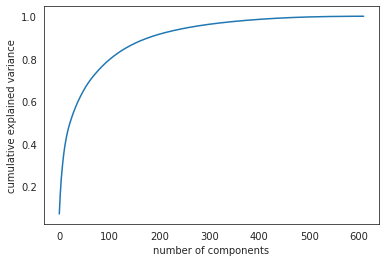

In [56]:
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

## Take Home Exercise

Use [Siricon wafer thickness](https://openmv.net/info/silicon-wafer-thickness) dataset which contains data
- $N=184$
- $k=9$

1. Build a PCA model on all the data.
2. Plot the scores for the first two components. What do you notice? Investigate the outliers, and the raw data for each of these unusual observations. What do you conclude about those observations?

In [58]:
dataset = pd.read_csv('silicon-wafer-thickness.csv')

In [59]:
dataset

,G1,G2,G3,G4,G5,G6,G7,G8,G9
0,0.175,0.188,-0.159,0.095,0.374,-0.238,-0.800,0.158,-0.211
1,0.102,0.075,0.141,0.180,0.138,-0.057,-0.075,0.072,0.072
2,0.607,0.711,0.879,0.765,0.592,0.187,0.431,0.345,0.187
3,0.774,0.823,0.619,0.370,0.725,0.439,-0.025,-0.259,0.496
4,0.504,0.644,0.845,0.681,0.502,0.151,0.404,0.296,0.260
...,...,...,...,...,...,...,...,...,...
179,0.535,0.524,0.649,0.475,0.486,0.657,0.941,0.527,0.494
180,0.041,0.056,0.194,0.234,-0.003,-0.310,0.267,-0.449,-0.432
181,0.507,0.563,0.539,0.634,0.471,0.578,0.686,0.763,0.576
182,-0.033,-0.025,0.118,0.148,-0.076,-0.403,-0.345,0.084,-0.473


In [60]:
X_std = StandardScaler().fit_transform(dataset)

In [61]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix n%s' %cov_mat)

Covariance matrix n[[1.00546448 0.98980538 0.97997602 0.97807363 0.9617337  0.85291894
  0.89103314 0.86019818 0.92713364]
 [0.98980538 1.00546448 0.96150716 0.97210764 0.94937944 0.87514197
  0.88108862 0.86983065 0.92269981]
 [0.97997602 0.96150716 1.00546448 0.9630117  0.95380349 0.82458104
  0.90500498 0.85394521 0.92042348]
 [0.97807363 0.97210764 0.9630117  1.00546448 0.93355597 0.85024231
  0.87547831 0.89414239 0.90416319]
 [0.9617337  0.94937944 0.95380349 0.93355597 1.00546448 0.81789593
  0.9099709  0.85671834 0.92875908]
 [0.85291894 0.87514197 0.82458104 0.85024231 0.81789593 1.00546448
  0.85218817 0.7998961  0.86151071]
 [0.89103314 0.88108862 0.90500498 0.87547831 0.9099709  0.85218817
  1.00546448 0.86016453 0.93411402]
 [0.86019818 0.86983065 0.85394521 0.89414239 0.85671834 0.7998961
  0.86016453 1.00546448 0.86054601]
 [0.92713364 0.92269981 0.92042348 0.90416319 0.92875908 0.86151071
  0.93411402 0.86054601 1.00546448]]


In [62]:
#Calculating eigenvectors and eigenvalues on covariance matrix
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors n%s' %eig_vecs)
print('nEigenvalues n%s' %eig_vals)

Eigenvectors n[[-0.34293529 -0.27930588 -0.19677077 -0.10214184  0.83109647  0.17797974
  -0.17296887 -0.05389205  0.00334829]
 [-0.34205778 -0.17552087 -0.20440386 -0.22916142 -0.48710536  0.48970181
  -0.51410232  0.03011197  0.12492233]
 [-0.33976186 -0.31601351 -0.1065087   0.07052951 -0.19270738  0.27462239
   0.70042445 -0.2764084  -0.29804231]
 [-0.33998424 -0.22756876 -0.01334615 -0.33277332 -0.15317905 -0.74936974
  -0.16313998 -0.2999629  -0.14175946]
 [-0.33765588 -0.25667926 -0.02250909  0.24445449 -0.07157376 -0.23475601
   0.12497629  0.82280271  0.08356459]
 [-0.31342948  0.73610506 -0.44393926 -0.3076452   0.03395745 -0.03498864
   0.19886935  0.14940338 -0.06273723]
 [-0.32900438  0.28707902  0.17806495  0.59997756 -0.00188503  0.01248504
  -0.34079134 -0.10903609 -0.53802836]
 [-0.31854414  0.17081961  0.82374024 -0.37212445  0.06735291  0.16077658
   0.10212974  0.08526433  0.06511294]
 [-0.3352621   0.14212656  0.0115875   0.41047088 -0.02431443 -0.09593391
   0.082

In [63]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
8.220007400098147
0.2554242830537094
0.20278783432579517
0.1774063007978436
0.010434441979268093
0.02647424068696167
0.030553682823402338
0.05654499324159255
0.06954715086213167


In [64]:
pca = PCA(n_components=2)
pca.fit_transform(dataset)
print(pca.explained_variance_ratio_)

[0.89993874 0.03280568]


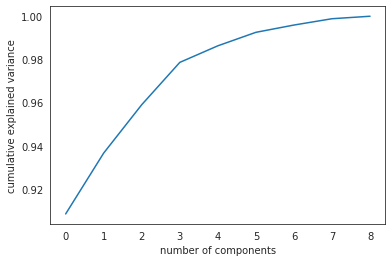

In [65]:
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

**Conclusion:**
PCA is used to identifying the main axes of variance within a data set and allows for easy data exploration to understand the key variables in the data and spot outliers.

Here, we have 8 number of components. it seems like we have got the converges and fix number of axis.